Original RGB Image (30x30):
[[[ 14  24  23]
  [ 14  24  23]
  [ 15  24  23]
  ...
  [ 84  76  63]
  [ 80  76  59]
  [ 75  71  59]]

 [[ 14  24  23]
  [ 14  24  23]
  [ 15  24  23]
  ...
  [ 90  84  61]
  [ 87  81  59]
  [ 82  76  59]]

 [[ 14  24  23]
  [ 14  24  23]
  [ 15  24  23]
  ...
  [ 95  90  57]
  [ 95  87  58]
  [ 91  82  58]]

 ...

 [[ 27  27  29]
  [ 26  26  28]
  [ 26  26  28]
  ...
  [171 173 170]
  [164 166 163]
  [165 167 164]]

 [[ 28  28  30]
  [ 27  27  29]
  [ 28  28  30]
  ...
  [ 31  33  31]
  [ 29  31  28]
  [ 31  32  30]]

 [[ 28  28  30]
  [ 28  27  29]
  [ 31  29  32]
  ...
  [ 34  42  32]
  [ 34  43  33]
  [ 33  41  32]]]


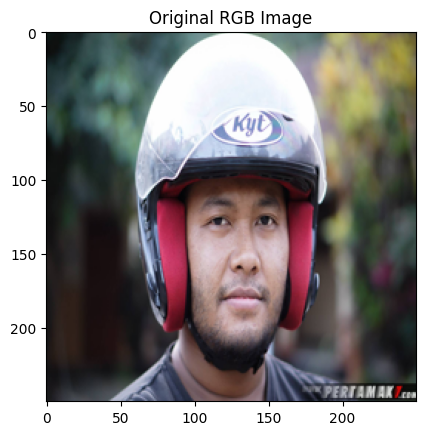

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Fungsi untuk membaca gambar dan memotong bagian 30x30
def load_and_crop_image(file_path):
    image = Image.open(file_path)
    image = image.resize((256, 256))  # Mengubah ukuran gambar agar cukup besar untuk dipotong
    image_rgb = np.array(image)[:250, :250, :250]
    return image_rgb

# Membaca dan memotong gambar
file_path = 'demo.jpg'  # Ganti dengan path ke file gambar yang ingin digunakan
image_rgb = load_and_crop_image(file_path)
print("Original RGB Image (30x30):")
print(image_rgb)

# Visualisasi gambar RGB asli
plt.imshow(image_rgb)
plt.title("Original RGB Image")
plt.show()



Grayscale Image (30x30):
[[ 20.8946  20.8946  21.1935 ...  76.9016  75.25    70.8205]
 [ 20.8946  20.8946  21.1935 ...  83.163   80.2773  75.8478]
 [ 20.8946  20.8946  21.1935 ...  87.7235  86.0765  81.9459]
 ...
 [ 27.2253  26.2254  26.2254 ... 172.0429 165.0436 166.0435]
 [ 28.2252  27.2253  28.2252 ...  32.1709  30.0571  31.4699]
 [ 28.2252  27.5242  29.9369 ...  38.4646  39.1656  37.5787]]


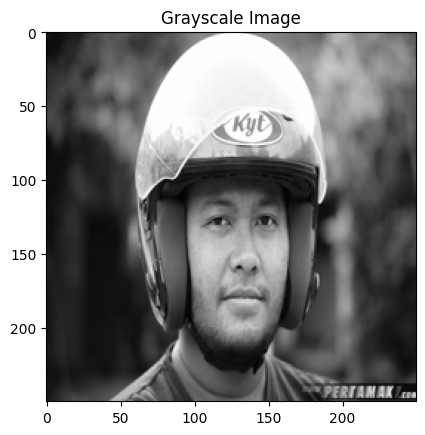

In [3]:
# Mengkonversi gambar RGB ke grayscale
def rgb_to_grayscale(rgb_image):
    return np.dot(rgb_image[...,:250], [0.2989, 0.5870, 0.1140])

image_gray = rgb_to_grayscale(image_rgb)
print("\nGrayscale Image (30x30):")
print(image_gray)

# Visualisasi gambar grayscale
plt.imshow(image_gray, cmap='gray')
plt.title("Grayscale Image")
plt.show()


In [4]:
# Normalisasi gambar grayscale
image_gray_normalized = image_gray / 255.0
print("\nNormalized Grayscale Image (250x250):")
print(image_gray_normalized)



Normalized Grayscale Image (250x250):
[[0.08193961 0.08193961 0.08311176 ... 0.3015749  0.29509804 0.27772745]
 [0.08193961 0.08193961 0.08311176 ... 0.32612941 0.31481294 0.29744235]
 [0.08193961 0.08193961 0.08311176 ... 0.34401373 0.3375549  0.32135647]
 ...
 [0.10676588 0.10284471 0.10284471 ... 0.67467804 0.6472298  0.65115098]
 [0.11068706 0.10676588 0.11068706 ... 0.12616039 0.11787098 0.12341137]
 [0.11068706 0.10793804 0.11739961 ... 0.15084157 0.15359059 0.14736745]]



Convolved Image:
[[-0.00351647  0.00824706  0.02862039 ...  0.03921176  0.03601569
   0.07519176]
 [ 0.00247098  0.01815569  0.02303765 ...  0.04878235  0.03062627
   0.07255137]
 [ 0.00453725  0.01630078  0.01903176 ...  0.05920471  0.02625804
   0.05872157]
 ...
 [ 0.00784235 -0.02352706 -0.06360863 ... -0.13719882 -0.91985725
  -0.34231451]
 [ 0.00784235 -0.02514627 -0.05985647 ... -0.19096549 -0.67120392
  -0.1109651 ]
 [-0.00279137 -0.03068667 -0.04922275 ... -0.10077843 -0.35241647
   0.0297502 ]]


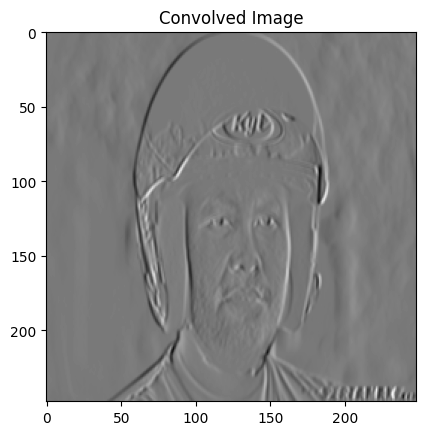

In [5]:
# Definisi kernel sederhana 3x3
kernel = np.array([[1, 0, -1], 
                   [1, 0, -1], 
                   [1, 0, -1]])

# Fungsi untuk melakukan konvolusi
def convolve2d(image, kernel):
    kernel_height, kernel_width = kernel.shape
    image_height, image_width = image.shape
    output = np.zeros((image_height - kernel_height + 1, image_width - kernel_width + 1))
    
    for i in range(image_height - kernel_height + 1):
        for j in range(image_width - kernel_width + 1):
            output[i, j] = np.sum(image[i:i+kernel_height, j:j+kernel_width] * kernel)
    
    return output

# Melakukan konvolusi pada gambar yang dinormalisasi
convolved_image = convolve2d(image_gray_normalized, kernel)
print("\nConvolved Image:")
print(convolved_image)

# Visualisasi hasil konvolusi
plt.imshow(convolved_image, cmap='gray')
plt.title("Convolved Image")
plt.show()



ReLU Activated Image:
[[0.         0.00824706 0.02862039 ... 0.03921176 0.03601569 0.07519176]
 [0.00247098 0.01815569 0.02303765 ... 0.04878235 0.03062627 0.07255137]
 [0.00453725 0.01630078 0.01903176 ... 0.05920471 0.02625804 0.05872157]
 ...
 [0.00784235 0.         0.         ... 0.         0.         0.        ]
 [0.00784235 0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.0297502 ]]


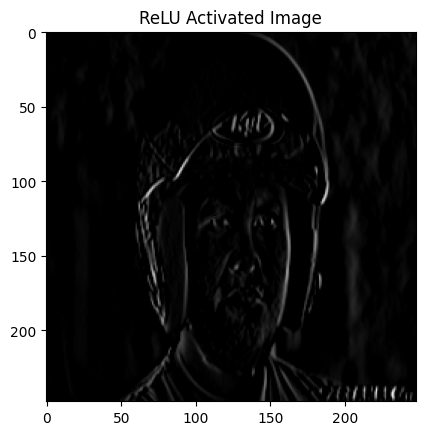

In [6]:
# Fungsi aktivasi ReLU
def relu(x):
    return np.maximum(0, x)

# Menerapkan ReLU pada hasil konvolusi
relu_activated_image = relu(convolved_image)
print("\nReLU Activated Image:")
print(relu_activated_image)

# Visualisasi hasil ReLU
plt.imshow(relu_activated_image, cmap='gray')
plt.title("ReLU Activated Image")
plt.show()



Pooled Image:
[[0.01815569 0.02862039 0.02242118 ... 0.18367451 0.16933098 0.07519176]
 [0.01630078 0.02286824 0.00743725 ... 0.16562118 0.17627922 0.05872157]
 [0.00430157 0.01943647 0.00157686 ... 0.11738824 0.13678275 0.04646902]
 ...
 [0.00505098 0.         0.         ... 0.13615373 0.49257608 0.        ]
 [0.00784235 0.         0.         ... 0.         0.90029373 0.        ]
 [0.00784235 0.         0.         ... 0.         0.77707569 0.0297502 ]]


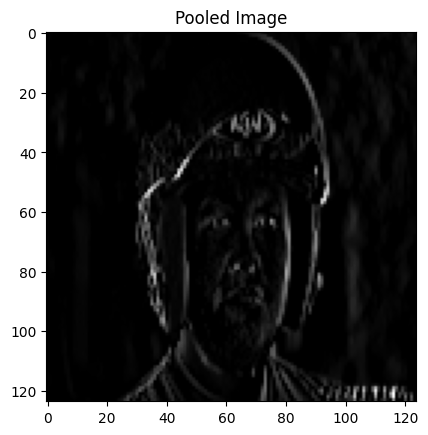

In [7]:
# Fungsi untuk melakukan pooling
def max_pooling(image, size=2, stride=2):
    pool_height, pool_width = size, size
    image_height, image_width = image.shape
    output_height = (image_height - pool_height) // stride + 1
    output_width = (image_width - pool_width) // stride + 1
    pooled_image = np.zeros((output_height, output_width))
    
    for i in range(0, image_height - pool_height + 1, stride):
        for j in range(0, image_width - pool_width + 1, stride):
            pooled_image[i//stride, j//stride] = np.max(image[i:i+pool_height, j:j+pool_width])
    
    return pooled_image

# Melakukan pooling pada gambar hasil ReLU
pooled_image = max_pooling(relu_activated_image)
print("\nPooled Image:")
print(pooled_image)

# Visualisasi hasil pooling
plt.imshow(pooled_image, cmap='gray')
plt.title("Pooled Image")
plt.show()


In [8]:
# Flattening hasil konvolusi
flattened_image = convolved_image.flatten()
print("\nFlattened Image:")
print(flattened_image)



Flattened Image:
[-0.00351647  0.00824706  0.02862039 ... -0.10077843 -0.35241647
  0.0297502 ]
